#### Learn to build a simple feed forward network from scratch using MNIST Dataset

### Step - 1. Know the Dataset

    1. For this project, we will be using the popular MNIST database. 
    2. It is a collection of 70K handwritten digits split into training and test set of 60K and 10K images respectively.
    
### Goal: 
       Our goal will be to *build a Neural Network* that can take any image and predict the digit in that image. We will use PyTorch's nn module which provides a much more convenient and powerful method for defining network architectures.

In [19]:
# Importing Required Libraries

import os
import pandas as pd
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from torch.autograd import Variable
%matplotlib inline

In [20]:
# Before laoding dataset, we will define a transform which is used to normalize the data

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

In [21]:
# Load the Dataset from torchvision package:
 
# Training data:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

#Test Data:
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

**Output:
        Now we have training data loaded into trainloader & test data loaded into valloader**

### Step - 2. Exploratory Data Analysis

In [22]:
#check out the **shape of the images** and **shape of the labels**:

dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

#Printing the size of one image

print(images[1].numpy().squeeze().shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
(28, 28)


**Output: The shape of images are torch.Size([64,1,28,28]), which means that there are 64 images in each batch and each image has a dimension of 28 x 28 pixels. Similarly, the labels have a shape as torch.Size([64]) as 64 images have 64 labels.**

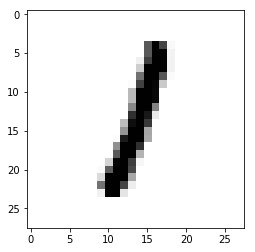

In [23]:
# Looking at the sample image displayed from training dataset:

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

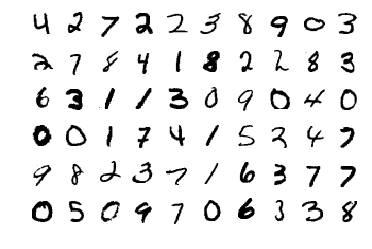

In [24]:
# Similarly displaying more images from training dataset:

figure = plt.figure()
for index in range(1, 61, 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [25]:
# To get *Number of input features*

inputs=images.view(images.shape[0],-1)
n_input=inputs.shape[1]

print("Shape of the input features:",n_input)

Shape of the input features: 784


In [26]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

### Step - 3. Building the Neural Network using **nn** module from PyTorch

In [27]:
## We will building the Neural Network Model using **nn module** from PyTorch which contain three layers.
## 1. an input layer, 2. an output layer and 3. an hidden layer.

In [28]:
# Hyperparameters for our network

#### - Using Sigmoid - Non Linear Activation for hidden Layers

input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [29]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0096,  0.0105, -0.0154,  ...,  0.0048,  0.0170, -0.0279],
        [-0.0051, -0.0068,  0.0058,  ..., -0.0035, -0.0068, -0.0222],
        [-0.0103,  0.0051,  0.0250,  ..., -0.0350, -0.0168,  0.0061],
        ...,
        [ 0.0289, -0.0008, -0.0004,  ..., -0.0309, -0.0134, -0.0057],
        [-0.0092, -0.0327, -0.0292,  ..., -0.0324, -0.0325, -0.0296],
        [ 0.0101,  0.0135,  0.0353,  ..., -0.0080, -0.0233,  0.0041]],
       requires_grad=True)

In [30]:
# Getting our data
images, labels = next(iter(trainloader))

# Flatten Images
images = images.view(images.shape[0],-1)

# Forward pass, to get our logits
logits = model(images)  #log probabilites
print(logits.shape)

torch.Size([64, 10])


In [31]:
# Define a Loss Function
criterion = nn.NLLLoss()

# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)
print(loss)

tensor(2.3279, grad_fn=<NllLossBackward>)


In [32]:
model.parameters()

<generator object Module.parameters at 0x000002F741E16ED0>

#### Final Model using for training data:

In [33]:
## Creating a Neural Network model using **nn.Sequential**
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

# Loading images from training data into the above model & getting logits of the model(as we are using *LogSoftmax* as ouptut)
images, labels = next(iter(trainloader))
images =images.view(images.shape[0],-1)

logits = model(images)

# Calcluating loss 
criterion = nn.NLLLoss()
loss = criterion(logits, labels)

print('Before backward pass: \n', model[0].weight.grad)

loss.backward()   #This computes the derivative of the loss with respect to the parameters using back propogation

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [ 0.0028,  0.0028,  0.0028,  ...,  0.0028,  0.0028,  0.0028],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        ...,
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004]])


### Step - 4. Optimization of the Model

#### Why Optimization of the Model ??
        1. Initially nn model iterates over the training data and updates the weights. 
        2. Instead we can use **torch.optim**, module provided by PyTorch which helps to optimize the model, SGD Optimizer perform **gradient descent** and **update the weights by back-propagation**.
        3. In each epoch (number of times we iterate over the training set), we can see a gradual decrease in training loss.

In [34]:
## Defining the Optimizer: We will be using SGD Optimizer for this model.

optimizer = optim.Adam(model.parameters(), lr=0.003)   ## Learning Rate is 0.0003 for this optimizer

epochs = []
train_losses = []
test_losses = []
epoch = 10

for e in range(epoch):
    runningloss = 0
    for images, labels in trainloader:
        
        #Flatten the images
        images = images.view(images.shape[0],-1)
        
        #Training pass
        optimizer.zero_grad()  # This clears the old gradients from the last step
        
        logits = model(images)
        
        #loss calculation
        loss = criterion(logits,labels)
        
        # Loss calculation using back propogation
        loss.backward()
        
        optimizer.step()  # Optimizer take a step absed on gradients of the parameters
        
        runningloss += loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in valloader:
                
                #Flatten the images
                images = images.view(images.shape[0],-1)
                log_ps=model(images)
                
                # Calculating loss of the test data
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                
                #Calculating accuracy of the model
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
                
        model.train()
        train_losses.append(runningloss/len(valloader))
        test_losses.append(test_loss/len(valloader))
        
        print("Epoch: {}/{}.. ".format(e+1, epoch),
              "Training Loss: {:.3f}.. ".format(runningloss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(valloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(valloader)))

Epoch: 1/10..  Training Loss: 0.335..  Test Loss: 0.194..  Test Accuracy: 0.937
Epoch: 2/10..  Training Loss: 0.174..  Test Loss: 0.177..  Test Accuracy: 0.946
Epoch: 3/10..  Training Loss: 0.142..  Test Loss: 0.155..  Test Accuracy: 0.955
Epoch: 4/10..  Training Loss: 0.119..  Test Loss: 0.137..  Test Accuracy: 0.959
Epoch: 5/10..  Training Loss: 0.113..  Test Loss: 0.133..  Test Accuracy: 0.962
Epoch: 6/10..  Training Loss: 0.103..  Test Loss: 0.129..  Test Accuracy: 0.961
Epoch: 7/10..  Training Loss: 0.091..  Test Loss: 0.113..  Test Accuracy: 0.964
Epoch: 8/10..  Training Loss: 0.090..  Test Loss: 0.104..  Test Accuracy: 0.970
Epoch: 9/10..  Training Loss: 0.087..  Test Loss: 0.132..  Test Accuracy: 0.962
Epoch: 10/10..  Training Loss: 0.079..  Test Loss: 0.147..  Test Accuracy: 0.963


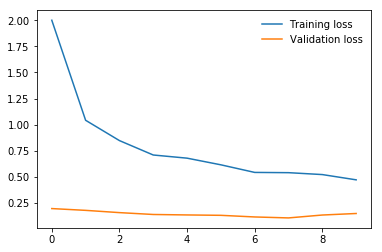

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

### Step - 5. Testing & Evaluation

Predicted Digit = 3


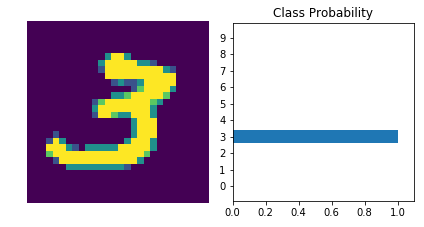

In [36]:
# Passing an image to the trained model from the validation set to see how the model works

images, labels = next(iter(valloader))

img = images[0].view(1, 784)

with torch.no_grad():    ## This will impact the auto grad engine and deactivate it, which will reduce the memory usage.
    logits = model(img)

ps = torch.exp(logits)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)